# Word Cloud with MeCab

## Janome

In [1]:
# Janomeのロード
from janome.tokenizer import Tokenizer # pip install janome
t = Tokenizer()
for token in t.tokenize(u'すもももももももものうち'):
    print(token)

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ


## Word Cloud 基本

http://sujiko.hatenablog.com/entry/2019/09/14/224231
http://cedro3.com/ai/word-cloud/

In [2]:
from wordcloud import WordCloud # conda install -c conda-forge wordcloud
import matplotlib.pyplot as plt
from janome.tokenizer import Tokenizer # pip install janome
import re as re

In [3]:
def create_wordcloud_1(text):
    
    t = Tokenizer()
    tokens = t.tokenize(text)
    
    word_list=[]
    for token in tokens:
        word = token.surface
        partOfSpeech = token.part_of_speech.split(',')[0]
        partOfSpeech2 = token.part_of_speech.split(',')[1]

        if partOfSpeech == "名詞":
            if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
                word_list.append(word)
                
    words=" ".join(word_list)
    font_path = "./font/lightnovel.otf"

    stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
                 u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
                 u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
                 u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'']

    wordcloud = WordCloud(background_color="white", max_font_size=100, width=900, 
                          height=600, font_path=font_path, stopwords=set(stop_words)).generate(words)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("result/SR.png")
    plt.show()

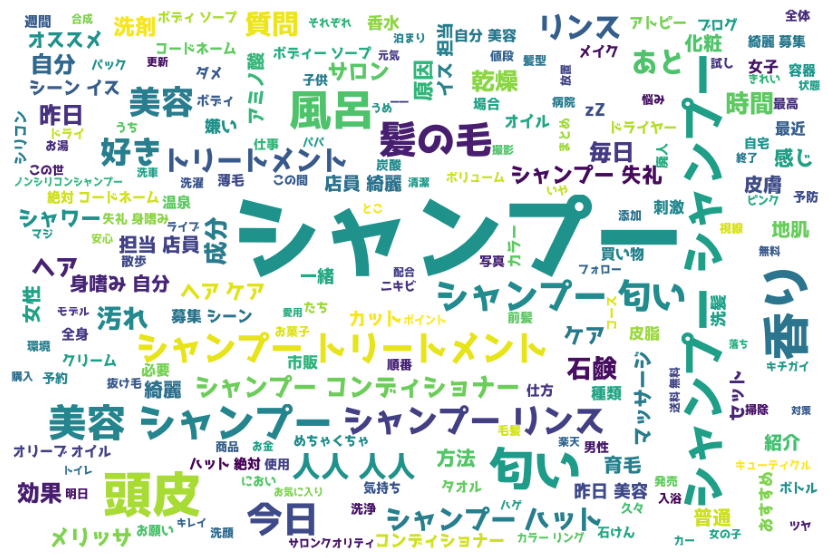

In [4]:
text = open("./text/190126_シャンプー_Tweet_CL.txt",mode="r",encoding="shift-jis").read()
create_wordcloud_1(text)

## StopWords

https://www.dskomei.com/entry/2019/04/04/191506

In [5]:
import urllib.request

# ストップワードをダウンロード
url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
urllib.request.urlretrieve(url, 'stop_word.txt')

('stop_word.txt', <http.client.HTTPMessage at 0x1eb208de508>)

In [6]:
with open('stop_word.txt', 'r', encoding='utf-8') as file:
    stopwords = [word.replace('\n', '') for word in file.readlines()]

stopwords

['あそこ',
 'あたり',
 'あちら',
 'あっち',
 'あと',
 'あな',
 'あなた',
 'あれ',
 'いくつ',
 'いつ',
 'いま',
 'いや',
 'いろいろ',
 'うち',
 'おおまか',
 'おまえ',
 'おれ',
 'がい',
 'かく',
 'かたち',
 'かやの',
 'から',
 'がら',
 'きた',
 'くせ',
 'ここ',
 'こっち',
 'こと',
 'ごと',
 'こちら',
 'ごっちゃ',
 'これ',
 'これら',
 'ごろ',
 'さまざま',
 'さらい',
 'さん',
 'しかた',
 'しよう',
 'すか',
 'ずつ',
 'すね',
 'すべて',
 'ぜんぶ',
 'そう',
 'そこ',
 'そちら',
 'そっち',
 'そで',
 'それ',
 'それぞれ',
 'それなり',
 'たくさん',
 'たち',
 'たび',
 'ため',
 'だめ',
 'ちゃ',
 'ちゃん',
 'てん',
 'とおり',
 'とき',
 'どこ',
 'どこか',
 'ところ',
 'どちら',
 'どっか',
 'どっち',
 'どれ',
 'なか',
 'なかば',
 'なに',
 'など',
 'なん',
 'はじめ',
 'はず',
 'はるか',
 'ひと',
 'ひとつ',
 'ふく',
 'ぶり',
 'べつ',
 'へん',
 'ぺん',
 'ほう',
 'ほか',
 'まさ',
 'まし',
 'まとも',
 'まま',
 'みたい',
 'みつ',
 'みなさん',
 'みんな',
 'もと',
 'もの',
 'もん',
 'やつ',
 'よう',
 'よそ',
 'わけ',
 'わたし',
 '',
 'ハイ',
 '',
 '',
 '上',
 '中',
 '下',
 '字',
 '',
 '',
 '年',
 '月',
 '日',
 '時',
 '分',
 '秒',
 '週',
 '火',
 '水',
 '木',
 '金',
 '土',
 '国',
 '都',
 '道',
 '府',
 '県',
 '市',
 '区',
 '町',
 '村',
 '',
 '',
 '各',
 '第',
 '方',
 '何',
 '的',
 '度',
 '文',
 '

In [7]:
def create_wordcloud_2(text):
    
    t = Tokenizer()
    tokens = t.tokenize(text)
    
    word_list=[]
    for token in tokens:
        word = token.surface
        partOfSpeech = token.part_of_speech.split(',')[0]
        partOfSpeech2 = token.part_of_speech.split(',')[1]

        if partOfSpeech == "名詞":
            if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
                word_list.append(word)
                
    words=" ".join(word_list)
    font_path = "./font/lightnovel.otf"
    
    with open('stop_word.txt', 'r', encoding='utf-8') as file:
        stopwords = [word.replace('\n', '') for word in file.readlines()]

    font_path = "./font/lightnovel.otf"

    wordcloud = WordCloud(background_color="white", max_font_size=100, width=900, 
                          height=600, font_path=font_path, stopwords=set(stopwords)).generate(words)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("result/SR.png")
    plt.show()

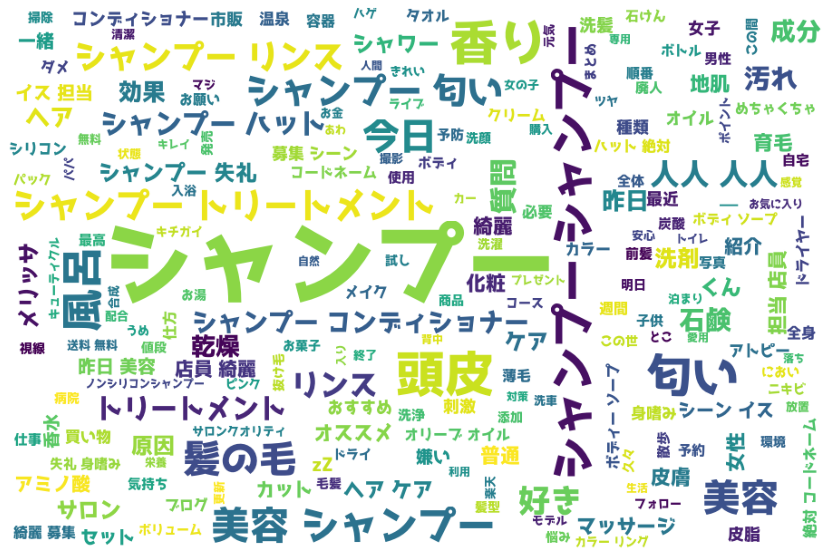

In [8]:
text = open("./text/190126_シャンプー_Tweet_CL.txt",mode="r",encoding="shift-jis").read()
create_wordcloud_2(text)

## Mask

https://sugiyamatatsuya.com/python%E3%81%A7wordcloud%E3%82%92%E4%BD%9C%E3%81%A3%E3%81%A6%E3%81%BF%E3%82%8B/

In [9]:
from PIL import Image
import numpy as np

In [10]:
def create_wordcloud_3(mask, text):
    
    t = Tokenizer()
    tokens = t.tokenize(text)
    
    word_list=[]
    for token in tokens:
        word = token.surface
        partOfSpeech = token.part_of_speech.split(',')[0]
        partOfSpeech2 = token.part_of_speech.split(',')[1]

        if partOfSpeech == "名詞":
            if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
                word_list.append(word)
                
    words=" ".join(word_list)
    font_path = "./font/lightnovel.otf"
    
    with open('stop_word.txt', 'r', encoding='utf-8') as file:
        stopwords = [word.replace('\n', '') for word in file.readlines()]

    font_path = "./font/lightnovel.otf"

    wordcloud = WordCloud(background_color="white", mask=mask, contour_width=3,
                          contour_color='steelblue',font_path=font_path, stopwords=set(stopwords)).generate(words)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("result/SR.png")
    plt.show()

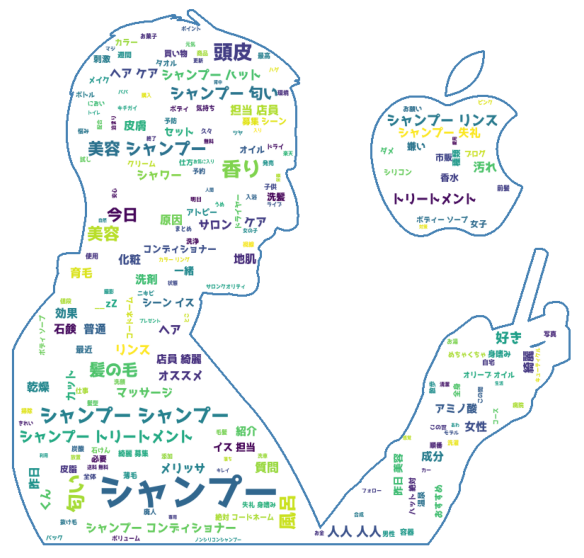

In [11]:
text = open("./text/190126_シャンプー_Tweet_CL.txt",mode="r",encoding="shift-jis").read()

mask = np.array(Image.open('./mask/jobs.png'))
create_wordcloud_3(mask, text)

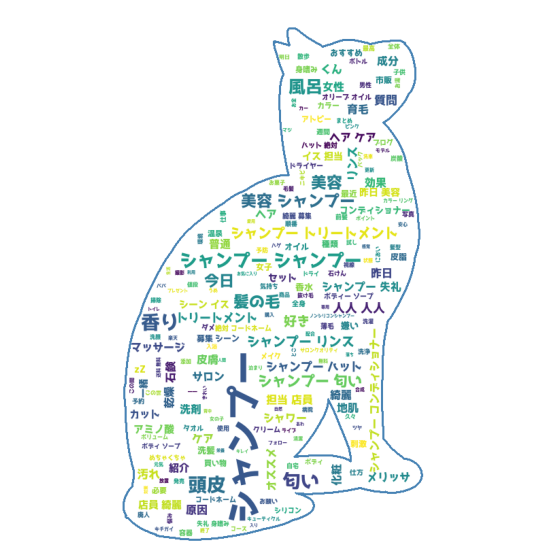

In [12]:
mask = np.array(Image.open('./mask/cat.png'))
create_wordcloud_3(mask, text)

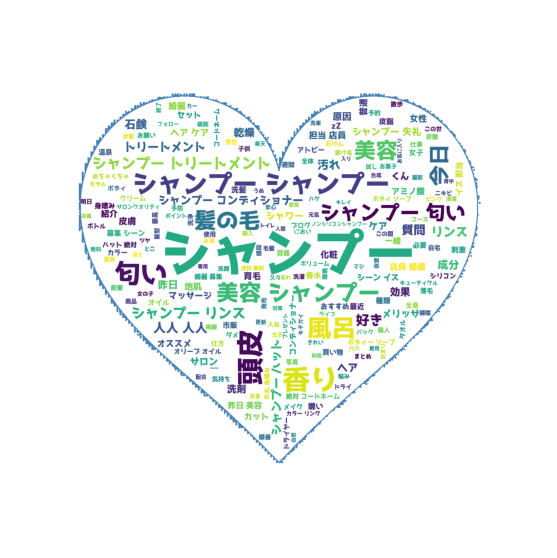

In [13]:
mask = np.array(Image.open('./mask/heart.jpg'))
create_wordcloud_3(mask, text)

## テキストデータスクレイピング

https://qiita.com/poorko/items/9140c75415d748633a10

In [14]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [22]:
html=requests.get("https://barconcertvienne.com/etc/27209/").text
soup=BeautifulSoup(html,"html.parser")
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="no-js no-svg" lang="ja" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/css/normalize.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/css/basic.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/css/wpbasic.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/style.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/modules/modules.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/skin/luster/skin.css.php" media="screen and (min-width: 769px)" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes

In [23]:
# scriptやstyleを含む要素を削除する
for script in soup(["script", "style"]):
    script.decompose()
print(soup)

<!DOCTYPE html>

<html class="no-js no-svg" lang="ja" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/css/normalize.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/css/basic.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/css/wpbasic.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/style.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/modules/modules.css" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/skin/luster/skin.css.php" media="screen and (min-width: 769px)" rel="stylesheet"/>
<link href="https://barconcertvienne.com/wp-content/themes/wp-alpha/css/mobile.css.php" 

In [24]:
# テキストのみを取得=タグは全部取る
text=soup.get_text()
print(text)














特別定額給付金を地域に還元！ 千葉駅周辺で頂く、ちょっと贅沢な極上グルメ　厳選10軒、絶品料理の数々をご紹介！！ | 孤高の千葉グルメ














































































 















運営者情報 お問い合わせ サイトマップ twitter RSS 







孤高の千葉グルメ 千葉市を中心とした、孤独なようで孤独でもない、ちょっと孤高な食べ歩き。だいたい当たりますが、時々派手にスベります。












 Menuコンテンツへ移動TOPへ
お勧め千葉グルメ
新店情報
最新グルメニュース
子供連れOKのお店
お問い合わせ
深夜版



ホーム千葉グルメ 役立つまとめ情報特別定額給付金を地域に還元！ 千葉駅周辺で頂く、ちょっと贅沢な極上グルメ　厳選10軒、絶品料理の数々をご紹介！！




スポンサーリンク







														特別定額給付金を地域に還元！ 千葉駅周辺で頂く、ちょっと贅沢な極上グルメ　厳選10軒、絶品料理の数々をご紹介！！													


 スポンサードリンク








Tweet
 

Pocket


新型コロナウイルスの影響で、景気、経済が落ち込む中
国民に経済活動を推し進めるべく、一律10万円が給付されるものとなった、特別定額給付金
 
※ 先週、我が家にもやっと届きました
 
この使い道は、様々でしょうが
私としては、地域に還元することで地元のお店らに活気づいて貰いたい
 
特に、この新型コロナの影響を受けた飲食店にこそ、しっかり還元したい
そう考えておりまして
 
で、せっかく頂く10万円の給付金
これを使って外食産業に貢献しようと思ってはみたものの
給付金の有無に関わらず、普段から地元で食べ歩いている身としては
 
「せっかくの10万円なら、普段は食べられない贅沢グルメを頂きたい！」
なんて邪な考えが浮かんでしまったのです
 
それならば、と立ち上げたのが今回の企画
本記事では、普段使いするには敷居が高いものの、今回の定額給付金の様に
 
「まとまった臨時収入が入った時や、特別な日にこそ頂いてみたい」
 
そんなワンラン

In [25]:
text = text.replace('\n', '')
print(text)

2019-05-01 07:27特選和牛大将軍 千葉富士見店■ とくせんわぎゅう だいしょうぐん ちばふじみてん■ URL：https://tabelog.com/chiba/A1201/A120101/12019531/（ネット予約 可）■ 住所：千葉県千葉市中央区富士見2-5-5■ 営業時間：11:00〜23:00■ 定休日：無休豪華な焼肉の代表格、新羅（シラ）　千葉中央で頂く、1皿1万円超えの超・高級和牛ご馳走系の焼肉からもう1軒 お店の場所は、千葉中央の蓮池前述した丸万寿司や竹田屋からもすぐ近くとなる、こちら、焼肉レストラン 新羅（シラ）となります 大通りから一本入った分かりづらい立地となる同店ですが頂けるお肉は、まさしく「超・一級品」揃い最もリーズナブルな和牛カルビですら1850円同店の特上となる、特選霜降りカルビともなれば、そのお値段は4250円という価格 もちろん、通常のカルビですら他店の上、特上クラスとなる絶品和牛となるのですが 同店を「高級店」と呼ぶにふさわしいメニューとなるのがこちら、 特選メニューの数々の存在です 和牛タンステーキの16,200円から始まり、特選和牛の盛り込みは17,485円A5開きカルビともなれば、200ｇながらもお値段はなんと・・・23,657円～！！ さすがに私も、このお値段を前に身じろいでしまい同特選メニューについては、未だ注文かなわず・・・ ですが、いつの日にかこそ・・・と、自分を奮い立たせる目標にもふさわしい特選過ぎる和牛が頂けるお店となります。 ▼ 焼肉レストラン 新羅の詳細はこちら ▼千葉を代表するワンランク上の焼肉レストラン 新羅（シラ） 接待やおもてなしに使いたい、肉質も接客も魅力な焼肉店焼肉レストラン 新羅■ やきにくれすとらん しら■ URL：https://tabelog.com/chiba/A1201/A120101/12000467/（ネット予約 可）■ 住所：千葉県千葉市中央区中央3-8-13■ 営業時間：ランチ（水～金のみ）11：30～13：30 / [月～土] 17:00～23:00 ■ 定休日：日曜日以上10軒が、千葉駅周辺でお勧めしたい「普段使いは出来ないけれど、ちょっと贅沢したい日に」足を運んでみたい、千葉の絶品・極上グルメとなります 今回は新型コロナ渦で支給される「特別定額給付金」の使

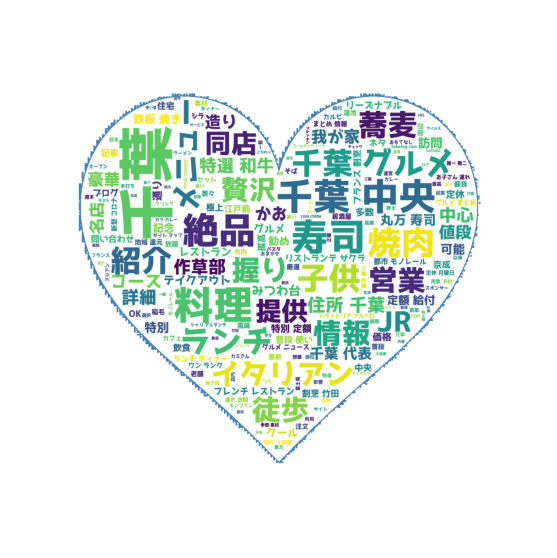

In [26]:
mask = np.array(Image.open('./mask/heart.jpg'))
create_wordcloud_3(mask, text)